# Task 1

Task 1: Build a **Multiple Linear Regression model** that predicts the number of deaths in various countries due to COVID-19. You are free to select and choose the dataset you would like to use while building the model and are allowed to use the Pandas Library in your code and can use Excel.

The following technical/tool constraint applies: you are NOT allowed to use any existing machine learning packages, such as scikit-learn.

As a general guide, you may need to undertake the following actions:
- Find data sets for the **number of deaths** in various countries **(a minimum of 20 countries)** due to COVID-19.
- Research for appropriate predictor variables to predict deaths due to COVID-19.
- You may use time as one of the predictors (in which case you could attempt to predict death rates in the future), or you may choose to leave it out (in which case, you would be looking at the deaths at a fixed chosen point in time).
- Find data sets on the chosen predictors for the various countries in the model.
- Use **plots** to visualize and understand your data.
- Build a **model** and **test the accuracy of your model**, using an appropriately chosen metric(hint: r2 is not a good metric for this task).
- If needed, improve your model by incorporating other predictors, and/or removing existing ones.
- Discuss your data sets, model, accuracy, and what metrics you used to judge the accuracy.

In [118]:
# import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load data 
We use data from [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/README.md) 

In [58]:
# importing the dataset by reading the csv file
pd.reset_option('display.max_rows')
df = pd.read_csv('covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134010,ZWE,Africa,Zimbabwe,2021-11-13,133393.0,64.0,32.143,4696.0,2.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134011,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134012,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134013,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


### Cleaning data

In [59]:
pd.set_option('display.max_rows', None)
print(pd.options.display.max_rows)
pd.reset_option('display.max_rows')

None


In [60]:
df.isna().sum()

iso_code                                        0
continent                                    8552
location                                        0
date                                            0
total_cases                                  7363
                                            ...  
human_development_index                     18110
excess_mortality_cumulative_absolute       129292
excess_mortality_cumulative                129292
excess_mortality                           129292
excess_mortality_cumulative_per_million    129292
Length: 67, dtype: int64

In [61]:
df.duplicated().sum()

0

### Visualising data

Target: `total_deaths`

Factors affecting death rates: (according to research)

*Factors we have data for and will explore are in **bold***

Healthcare Systems (healthcare capacity)
- `icu_patients`
- `icu_patients_per_million`
- `hosp_patients`
- `hosp_patients_per_million`
- `hospital_beds_per_thousand`
- `handwashing_facilities`

Nature of disease
- `reproduction_rate` (measure no of contacts per unit time)

National Policies
- `stringency_index` 
- `total_tests`
- `total_vaccinations`

Demographics/health
- `population_density`
- `aged_65_older` (Share of the population that is 65 years and older, most recent year available)
- ~~`cardiovasc_death_rate`~~
- ~~`diabetes_prevalence`~~

Economy
- `gdp_per_capita`
- `extreme_poverty`

Others
- `continent`
- `location`
- `date`


Text(0.5, 1.0, 'Total deaths vs date')

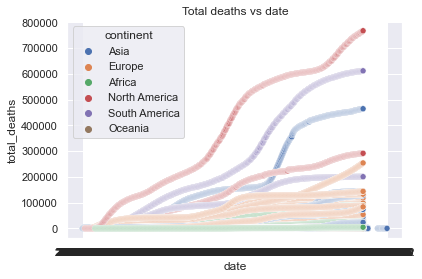

In [62]:
myplot = sns.scatterplot(x='date', y='total_deaths', hue='continent', data=df)
myplot.set_title('Total deaths vs date', fontsize=12)

In [105]:
columns_cat=['date','location','continent']
columns_num=['population_density','gdp_per_capita','total_deaths',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']
         
df_cat = df.loc[((df['location']=='Argentina')| (df['location']=='Australia') | (df['location']=='Brazil') | (df['location']=='Canada') | 
(df['location']=='China') | (df['location']=='France') | (df['location']=='Germany') | (df['location']=='India') | (df['location']=='Indonesia') | 
(df['location']=='Italy') | (df['location']=='Japan') | (df['location']=='Mexico') | (df['location']=='Russia') | (df['location']=='Saudi Arabia') | 
(df['location']=='South Africa') | (df['location']=='South Korea') | (df['location']=='Turkey') | (df['location']=='United Kingdom') | 
(df['location']=='United States') | (df['location']=='Singapore') | (df['location']=='Malaysia') | (df['location']=='Hong Kong')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')) ,columns_cat]

df_num = df.loc[((df['location']=='Argentina')| (df['location']=='Australia') | (df['location']=='Brazil') | (df['location']=='Canada') | 
(df['location']=='China') | (df['location']=='France') | (df['location']=='Germany') | (df['location']=='India') | (df['location']=='Indonesia') | 
(df['location']=='Italy') | (df['location']=='Japan') | (df['location']=='Mexico') | (df['location']=='Russia') | (df['location']=='Saudi Arabia') | 
(df['location']=='South Africa') | (df['location']=='South Korea') | (df['location']=='Turkey') | (df['location']=='United Kingdom') | 
(df['location']=='United States') | (df['location']=='Singapore') | (df['location']=='Malaysia') | (df['location']=='Hong Kong')) &
((df['date']> '2021-01-01') & (df['date']< '2021-11-17')),columns_num]

#(df['continent']=='Europe') |

In [149]:
def normalize_minmax(dfin):
    df_copy=dfin.copy()
    min_v=dfin.min(axis=0)
    max_v=dfin.max(axis=0)
    dfout=(df_copy-min_v)/(max_v-min_v)
    return dfout

data_norm = normalize_minmax(df_num)
stats = data_norm.describe()
# display(stats)

frames=[df_cat , data_norm]
result = pd.concat(frames,axis=1)
result=result.fillna(0)
display(result)

,date,location,continent,population_density,gdp_per_capita,total_deaths,extreme_poverty,stringency_index,total_tests,total_vaccinations,reproduction_rate,handwashing_facilities,hospital_beds_per_thousand,hosp_patients_per_million,hosp_patients,icu_patients_per_million,icu_patients
5039,2021-01-02,Argentina,South America,0.001640,0.158102,0.056604,0.023697,0.860388,0.002571,0.000000,0.354067,0.0,0.357029,0.000000,0.000000,0.000000,0.000000
5040,2021-01-03,Argentina,South America,0.001640,0.158102,0.056743,0.023697,0.860388,0.002611,0.000000,0.363636,0.0,0.357029,0.000000,0.000000,0.000000,0.000000
5041,2021-01-04,Argentina,South America,0.001640,0.158102,0.056942,0.023697,0.860388,0.002689,0.000017,0.373206,0.0,0.357029,0.000000,0.000000,0.000000,0.000000
5042,2021-01-05,Argentina,South America,0.001640,0.158102,0.057139,0.023697,0.860388,0.002774,0.000000,0.377990,0.0,0.357029,0.000000,0.000000,0.000000,0.000000
5043,2021-01-06,Argentina,South America,0.001640,0.158102,0.057388,0.023697,0.860388,0.002861,0.000000,0.377990,0.0,0.357029,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127132,2021-11-12,United States,North America,0.004096,0.604216,0.995702,0.052133,0.316233,1.000000,0.184515,0.000000,0.0,0.178914,0.202066,0.310277,0.368353,0.387182
127133,2021-11-13,United States,North America,0.004096,0.604216,0.996293,0.052133,0.316233,0.000000,0.184892,0.000000,0.0,0.178914,0.200826,0.308523,0.369812,0.388642
127134,2021-11-14,United States,North America,0.004096,0.604216,0.996449,0.052133,0.316233,0.000000,0.185005,0.000000,0.0,0.178914,0.202687,0.311158,0.368939,0.387773
127135,2021-11-15,United States,North America,0.004096,0.604216,0.998109,0.052133,0.316233,0.000000,0.185044,0.000000,0.0,0.178914,0.208407,0.319250,0.374015,0.392882


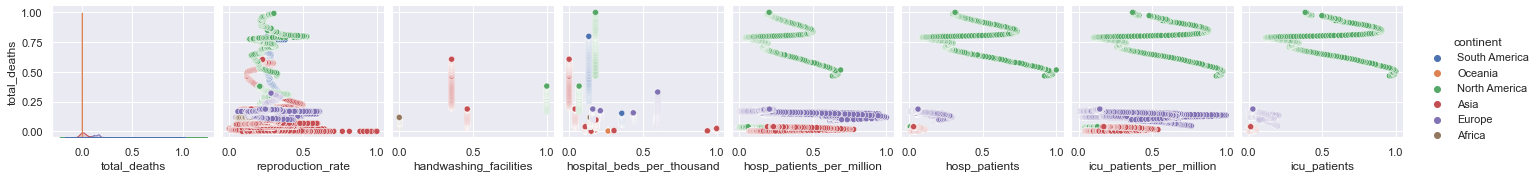

In [107]:
myplot = sns.pairplot(data=result, hue='continent',x_vars=['total_deaths','reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients'],y_vars=['total_deaths'])

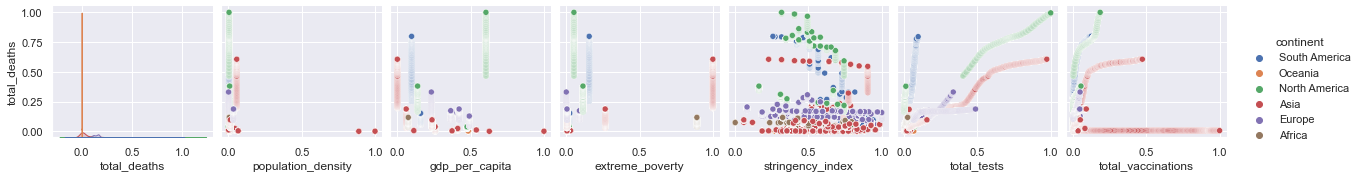

In [117]:
myplot = sns.pairplot(data=result, hue='continent',x_vars=['total_deaths','population_density','gdp_per_capita',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations'],y_vars=['total_deaths'])

In [169]:
feature=['population_density','gdp_per_capita',
         'extreme_poverty','stringency_index','total_tests','total_vaccinations',
         'reproduction_rate','handwashing_facilities','hospital_beds_per_thousand','hosp_patients_per_million',
         'hosp_patients','icu_patients_per_million','icu_patients']
df_feature=result.loc[:,feature]
print(df_feature.shape)
df_target=result.loc[:,['total_deaths']]
print(df_target.shape)

(7018, 13)
(7018, 1)


In [170]:
def compute_cost(X, y, beta):
    J = 0
    #calculate m, no of rows/data pt
    m = X.shape[0]
    
    #calculate yp, predicted target value from X and beta
    yp = np.matmul(X, beta)
    
    #calculate the error
    error = yp-y
    
    #calculate the cost
    J = (1/(2*m))*np.matmul(error.T, error)
    J= J[0][0] #to get the float
    return J

In [171]:
def prepare_feature(df_feature):
    #numpy is just arrays
    feature = df_feature.to_numpy()
    array1 = np.ones((feature.shape[0],1))
    X = np.concatenate((array1, feature), axis = 1)
    return X

In [172]:
def prepare_target(df_target):
    return df_target.to_numpy() 

In [173]:
X = prepare_feature(df_feature)
print(X.shape)
target = prepare_target(df_target)

(7018, 14)


In [174]:
def gradient_descent(X, y, beta, alpha, num_iters):
    #calculate m from shape of X or y
    m = X.shape[0]
    J_storage = np.zeros(num_iters)

    #for the number of iterations
    for n in range(num_iters):
        #--> compute the predicted y
        yp = np.matmul(X, beta)
        
        #--> compute the error
        error = yp - y
        
        #--> compute the new beta
        beta = beta - (alpha/m)*np.matmul(X.T, error)
        
        #--> compute J using the new beta and store it
        J_storage[n] = compute_cost(X, y, beta)
        
    return beta, J_storage

In [181]:
iterations = 15000
alpha = 0.01
dim=X.shape[1]
print(dim)
print(X)
beta = np.zeros((dim,1))

beta, J_storage = gradient_descent(X, target, beta, alpha, iterations)
print(beta)


14
[[1.         0.0016398  0.15810185 ... 0.         0.         0.        ]
 [1.         0.0016398  0.15810185 ... 0.         0.         0.        ]
 [1.         0.0016398  0.15810185 ... 0.         0.         0.        ]
 ...
 [1.         0.00409553 0.60421631 ... 0.31115778 0.36893906 0.38777283]
 [1.         0.00409553 0.60421631 ... 0.31924967 0.37401521 0.39288197]
 [1.         0.00409553 0.60421631 ... 0.31360417 0.36545926 0.38426248]]
[[ 0.24084608]
 [-0.03733146]
 [-0.17165557]
 [-0.0660588 ]
 [-0.11822488]
 [ 0.57442147]
 [-0.00866978]
 [-0.02863414]
 [ 0.09927393]
 [-0.09796161]
 [-0.12036046]
 [ 0.20704236]
 [ 0.06515593]
 [ 0.30961059]]


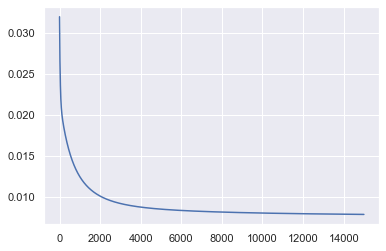

In [182]:
plt.plot(J_storage)

In [176]:
def predict_norm(X, beta):
    return np.matmul(X, beta)

In [177]:
def predict(df_feature, beta):
    feature_norm = normalize_z(df_feature)
    X = prepare_feature(feature_norm)
    return predict_norm(X, beta)

In [180]:
pred = predict(df_feature, beta)
plt.plot(df_feature['total_deaths'],target,'o')
plt.plot(df_feature['total_deaths'],pred,'-')

NameError: name 'df_feature_test' is not defined